<a href="https://colab.research.google.com/github/mangorlica-metallica/pythonforfinance/blob/main/oil_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The import**

In [6]:
import pandas as pd
import mplfinance as mpf
import mplfinance as fplt
import yfinance as yf
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

**Get the data**

In [7]:
df = yf.download("CL=F", start="2023-01-01", end="2024-01-01")
df['ma5'] = pd.Series.rolling(df['Adj Close'], window =5).mean()
df['ma10'] = pd.Series.rolling(df['Adj Close'], window =10).mean()
df['ma20'] = pd.Series.rolling(df['Adj Close'], window =20).mean()
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ma5,ma10,ma20
Date,,,,,,,,,
2023-01-03,80.570000,81.500000,76.599998,76.930000,76.930000,338520,NaN,NaN,NaN
2023-01-04,77.250000,77.419998,72.730003,72.839996,72.839996,352434,NaN,NaN,NaN
2023-01-05,73.250000,74.919998,72.459999,73.669998,73.669998,300731,NaN,NaN,NaN
2023-01-06,73.970001,75.470001,73.239998,73.769997,73.769997,258128,NaN,NaN,NaN
2023-01-09,73.470001,76.739998,73.470001,74.629997,74.629997,329290,74.367998,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-06-05,75.029999,75.059998,71.730003,72.150002,72.150002,383943,70.307999,71.527999,71.6915
2023-06-06,71.989998,72.330002,70.129997,71.739998,71.739998,314962,70.763998,71.502999,71.6205
2023-06-07,71.559998,73.190002,71.010002,72.529999,72.529999,299127,71.651999,71.464999,71.5615


**Plot the candlestick graph with simple moving average also the trading volume per day**

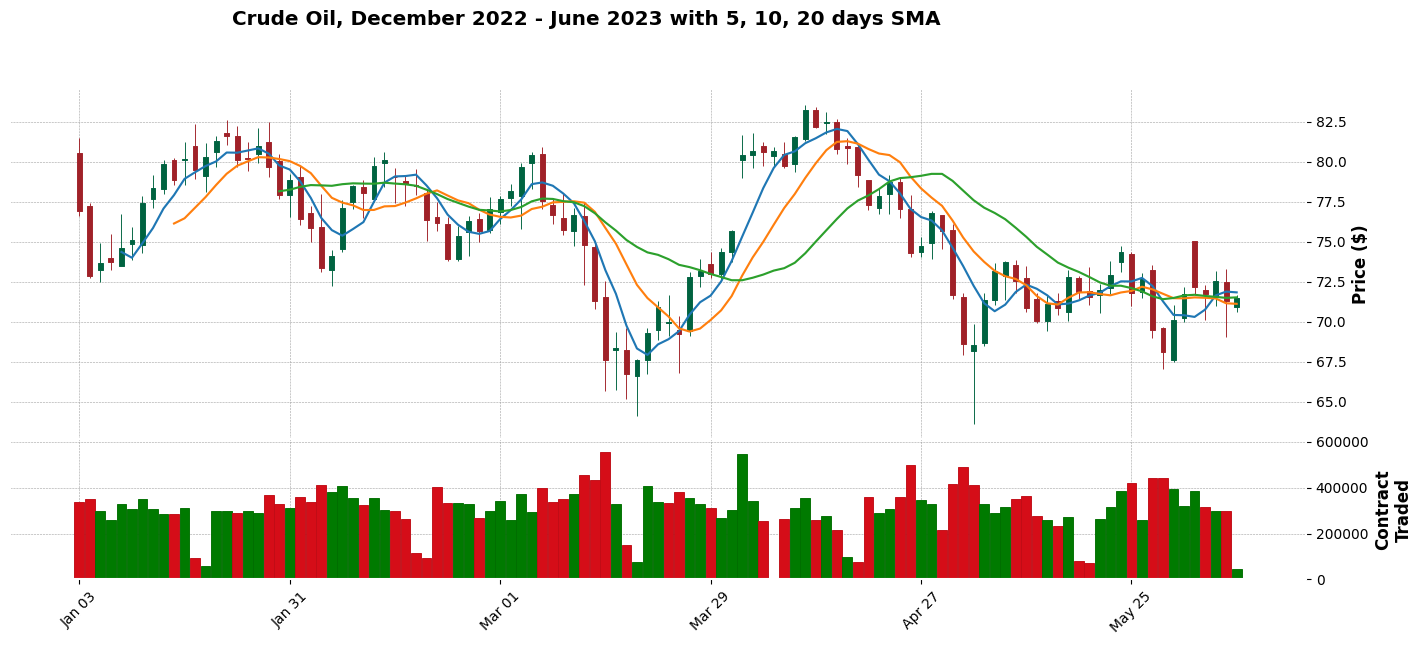

In [8]:
sma = fplt.make_addplot(df[["ma5", "ma10" ,"ma20"]])
fplt.plot(df,type='candle', 
          style='charles' ,
          title='Crude Oil, December 2022 - June 2023 with 5, 10, 20 days SMA',
          ylabel='Price ($)', 
          volume=True, 
          figsize=(18,7),
          ylabel_lower='Contract\nTraded',
          addplot = sma,
        )

In [9]:
df['Adj Close'].describe()

count    111.000000
mean      75.460270
std        4.053767
min       66.739998
25%       72.070000
50%       75.680000
75%       78.860001
max       83.260002
Name: Adj Close, dtype: float64

**I am now checking to daily returns of crude oil**

In [10]:
df['returns'] = (df['Adj Close']/df['Adj Close'].shift(1))-1
df.head()

,Open,High,Low,Close,Adj Close,Volume,ma5,ma10,ma20,returns
Date,,,,,,,,,,
2023-01-03,80.570000,81.500000,76.599998,76.930000,76.930000,338520,NaN,NaN,NaN,NaN
2023-01-04,77.250000,77.419998,72.730003,72.839996,72.839996,352434,NaN,NaN,NaN,-0.053165
2023-01-05,73.250000,74.919998,72.459999,73.669998,73.669998,300731,NaN,NaN,NaN,0.011395
2023-01-06,73.970001,75.470001,73.239998,73.769997,73.769997,258128,NaN,NaN,NaN,0.001357
2023-01-09,73.470001,76.739998,73.470001,74.629997,74.629997,329290,74.367998,NaN,NaN,0.011658


**use displot to visualize it**

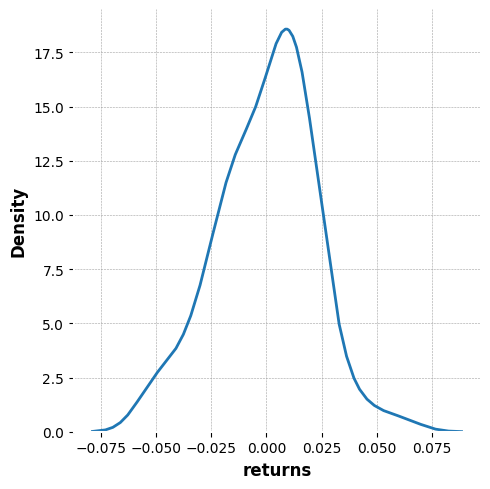

In [12]:
sns.displot(data=df, x="returns", kind="kde")

In [13]:
df['returns'].describe()

count    110.000000
mean      -0.000426
std        0.021913
min       -0.053165
25%       -0.013437
50%        0.003276
75%        0.012674
max        0.062773
Name: returns, dtype: float64

**now get datas of other energy commodities such as Brent Crude Oil**

In [14]:
df = yf.download("CL=F,HO=F,NG=F,RB=F,BZ=F", start="2022-12-01", end="2023-04-01")
newdf = df['Adj Close'].rename(columns={"CL=F": "Crude Oil", 
                   "HO=F": "Heat Oil", 
                   "NG=F": "Natural Gas",
                   "RB=F": "RBOB Gasoil", 
                   "BZ=F":"Brent Crude Oil"})
newdf

[*********************100%***********************]  5 of 5 completed


,Brent Crude Oil,Crude Oil,Heat Oil,Natural Gas,RBOB Gasoil
Date,,,,,
2022-12-01,86.879997,81.220001,3.2624,6.738,2.3420
2022-12-02,85.570000,79.980003,3.1685,6.281,2.2804
2022-12-05,82.680000,76.930000,2.9998,5.577,2.2019
2022-12-06,79.349998,74.250000,2.9155,5.469,2.1491
2022-12-07,77.169998,72.010002,2.7805,5.723,2.0772
...,...,...,...,...,...
2023-03-27,78.120003,72.809998,2.7704,2.088,2.6842
2023-03-28,78.650002,73.199997,2.7696,2.030,2.7121
2023-03-29,78.279999,72.970001,2.6581,1.991,2.6681


**lets check their daily return**

In [15]:
returns = newdf.pct_change()
returns

,Brent Crude Oil,Crude Oil,Heat Oil,Natural Gas,RBOB Gasoil
Date,,,,,
2022-12-01,NaN,NaN,NaN,NaN,NaN
2022-12-02,-0.015078,-0.015267,-0.028782,-0.067824,-0.026302
2022-12-05,-0.033774,-0.038135,-0.053243,-0.112084,-0.034424
2022-12-06,-0.040276,-0.034837,-0.028102,-0.019365,-0.023979
2022-12-07,-0.027473,-0.030168,-0.046304,0.046444,-0.033456
...,...,...,...,...,...
2023-03-27,0.041739,0.051256,0.027901,-0.057762,0.036971
2023-03-28,0.006784,0.005356,-0.000289,-0.027778,0.010394
2023-03-29,-0.004704,-0.003142,-0.040259,-0.019212,-0.016224


**create a pairplot of the return dataframe**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

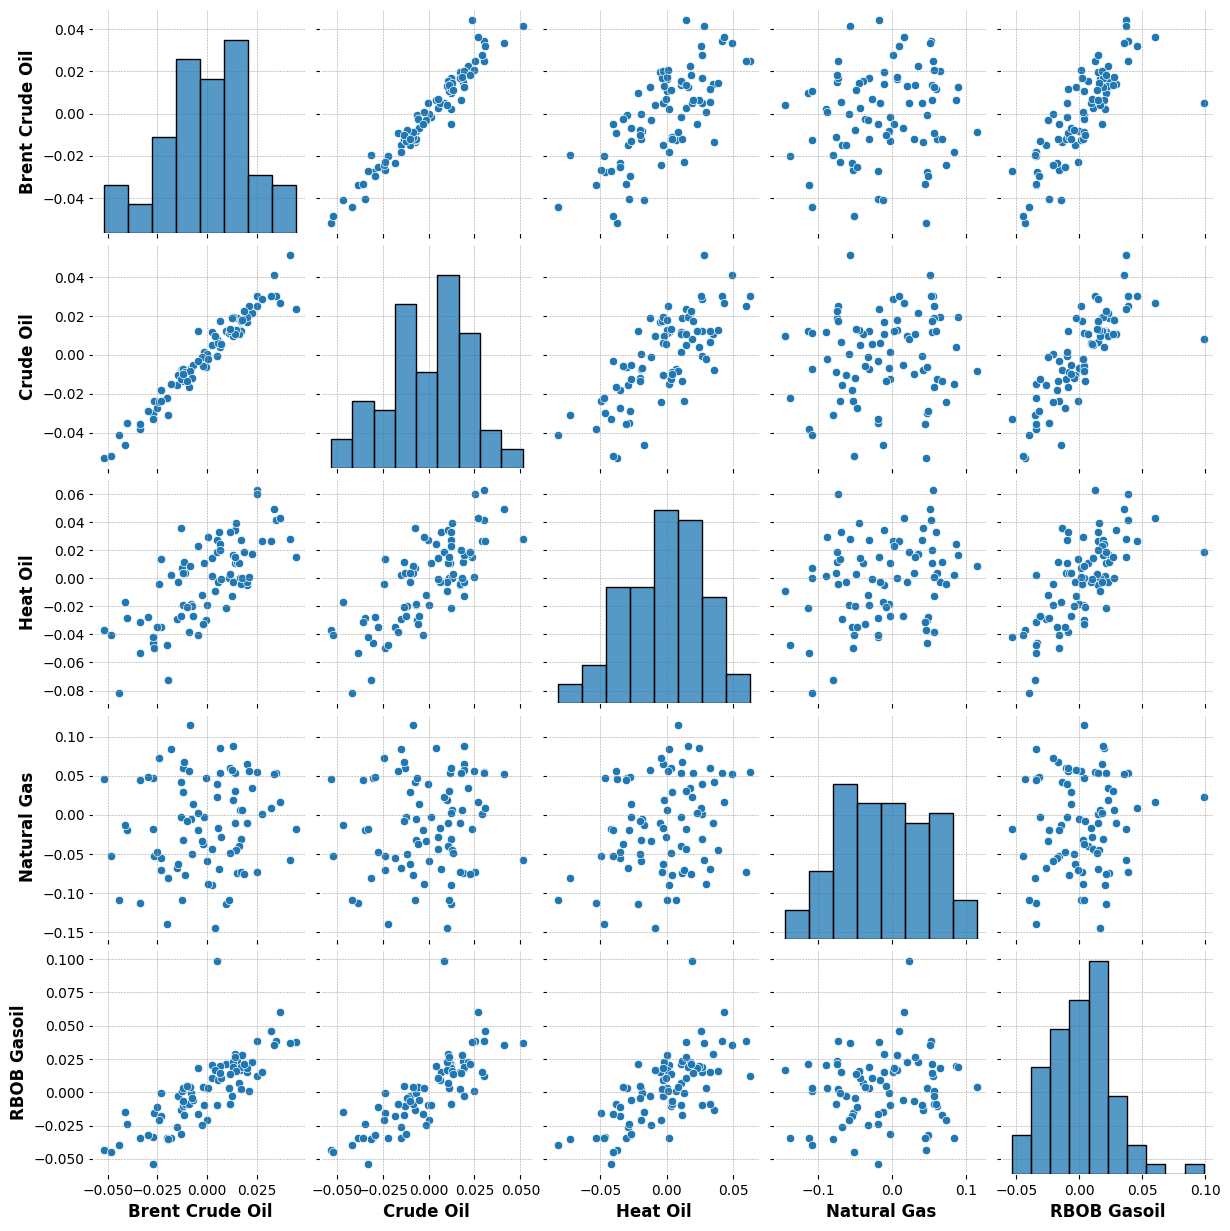

In [16]:
sns.pairplot(returns , palette="flare")

In [17]:
returns.idxmin()

Brent Crude Oil   2023-01-04
Crude Oil         2023-01-04
Heat Oil          2023-01-03
Natural Gas       2023-03-06
RBOB Gasoil       2023-02-03
dtype: datetime64[ns]

In [18]:
returns.idxmax()

Brent Crude Oil   2022-12-30
Crude Oil         2023-03-27
Heat Oil          2022-12-12
Natural Gas       2023-02-27
RBOB Gasoil       2023-03-01
dtype: datetime64[ns]

**find out the standard deviation and plot it to see which one is the riskiest**

In [19]:
returns.std()

Brent Crude Oil    0.021309
Crude Oil          0.021817
Heat Oil           0.029216
Natural Gas        0.059762
RBOB Gasoil        0.025790
dtype: float64

<Axes: xlabel='Date'>

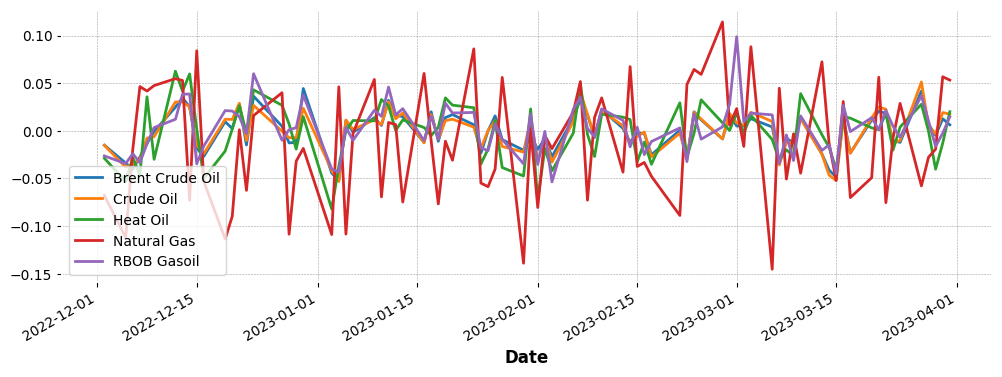

In [20]:
returns.plot(figsize=(12,4),label=df)

<Axes: xlabel='Date'>

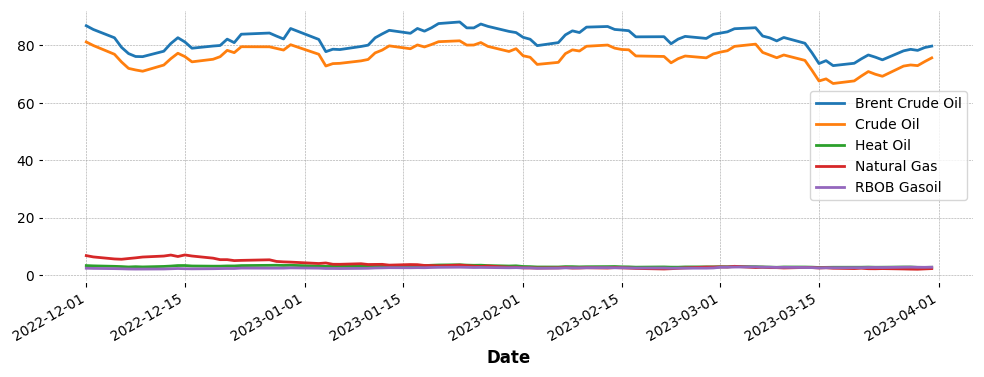

In [21]:
newdf.plot(figsize=(12,4),label=newdf)

**create a heatmap to see which one is correlated with each other**

<Axes: >

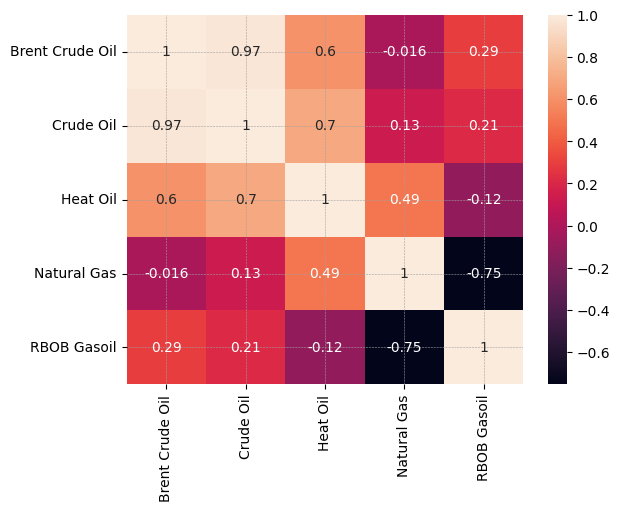

In [22]:
sns.heatmap(newdf.corr(),annot=True)